In [1]:
import pandas as pd

# Assuming 'your_data.csv' is the name of your CSV file
df = pd.read_csv('../HackathonData2024.csv')

In [2]:
# Impute missing values (example using mean imputation)
df.fillna(df.mean(), inplace=True)

C:\Users\power\AppData\Local\Temp/ipykernel_14216/1932263027.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [3]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['Area', 'Fluid System','Development Strategy','CODEV_POSITION','CODEV_FORMATION_POSITION'])

In [4]:
from sklearn.model_selection import train_test_split

# Assuming 'target_column' is the column you want to predict
X = df.drop('Avg Pump Difference', axis=1)
y = df['Avg Pump Difference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Example: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 307.98216181301353


In [6]:
import numpy as np

# Example: Monte Carlo simulations for uncertainty
num_realizations = 200
realizations = []

for _ in range(num_realizations):
    # Sample with replacement from the predictions
    realization = np.random.choice(predictions, len(predictions), replace=True)
    realizations.append(realization)

In [7]:
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already split your data into X_train and y_train
# Example of feature importance using RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_
important_features = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
print(important_features)

Avg Open Pressure                  0.209520
Pressure Gradient (psi/ft) new     0.196631
Fluid System_Young                 0.121166
Well ID                            0.074013
Avg Close Pressure                 0.047477
                                     ...   
Development Strategy_Pepsi         0.000004
Area_Crater Lake                   0.000003
Development Strategy_Sprite        0.000002
Development Strategy_Pibb Extra    0.000002
Development Strategy_Dr Pepper     0.000000
Length: 80, dtype: float64


In [8]:
from sklearn.model_selection import GridSearchCV

# Example of grid search for hyperparameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions_tuned = best_model.predict(X_test)

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 200}


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Example of using a different model (Gradient Boosting)
new_model = GradientBoostingRegressor()
new_model.fit(X_train, y_train)
predictions_new = new_model.predict(X_test)

In [10]:
from sklearn.preprocessing import StandardScaler

# Example of scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.ensemble import VotingRegressor

# Example of using a Voting Regressor
ensemble_model = VotingRegressor([('linear', LinearRegression()), ('rf', RandomForestRegressor())])
ensemble_model.fit(X_train, y_train)
predictions_ensemble = ensemble_model.predict(X_test)

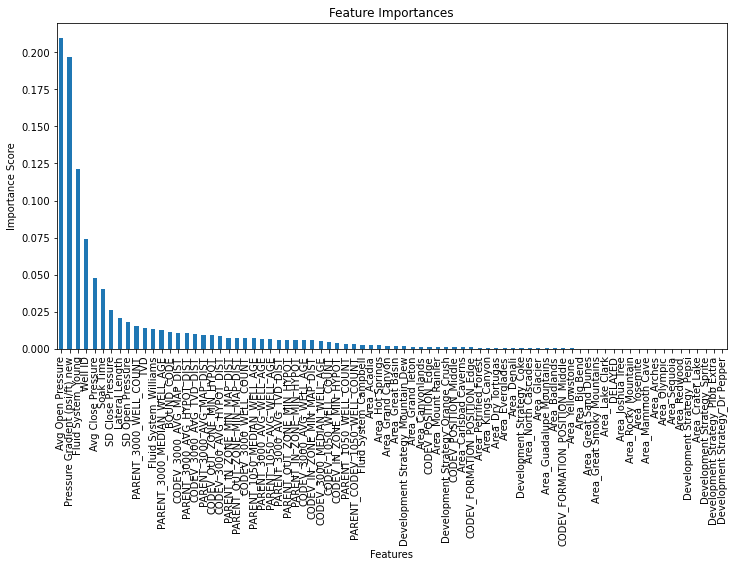

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already calculated feature importances
# (you can use the code snippet in the previous response to calculate it)

# Plotting feature importances
plt.figure(figsize=(12, 6))
important_features.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

C:\Users\power\AppData\Local\Temp/ipykernel_14216/1493804605.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['target'] = y


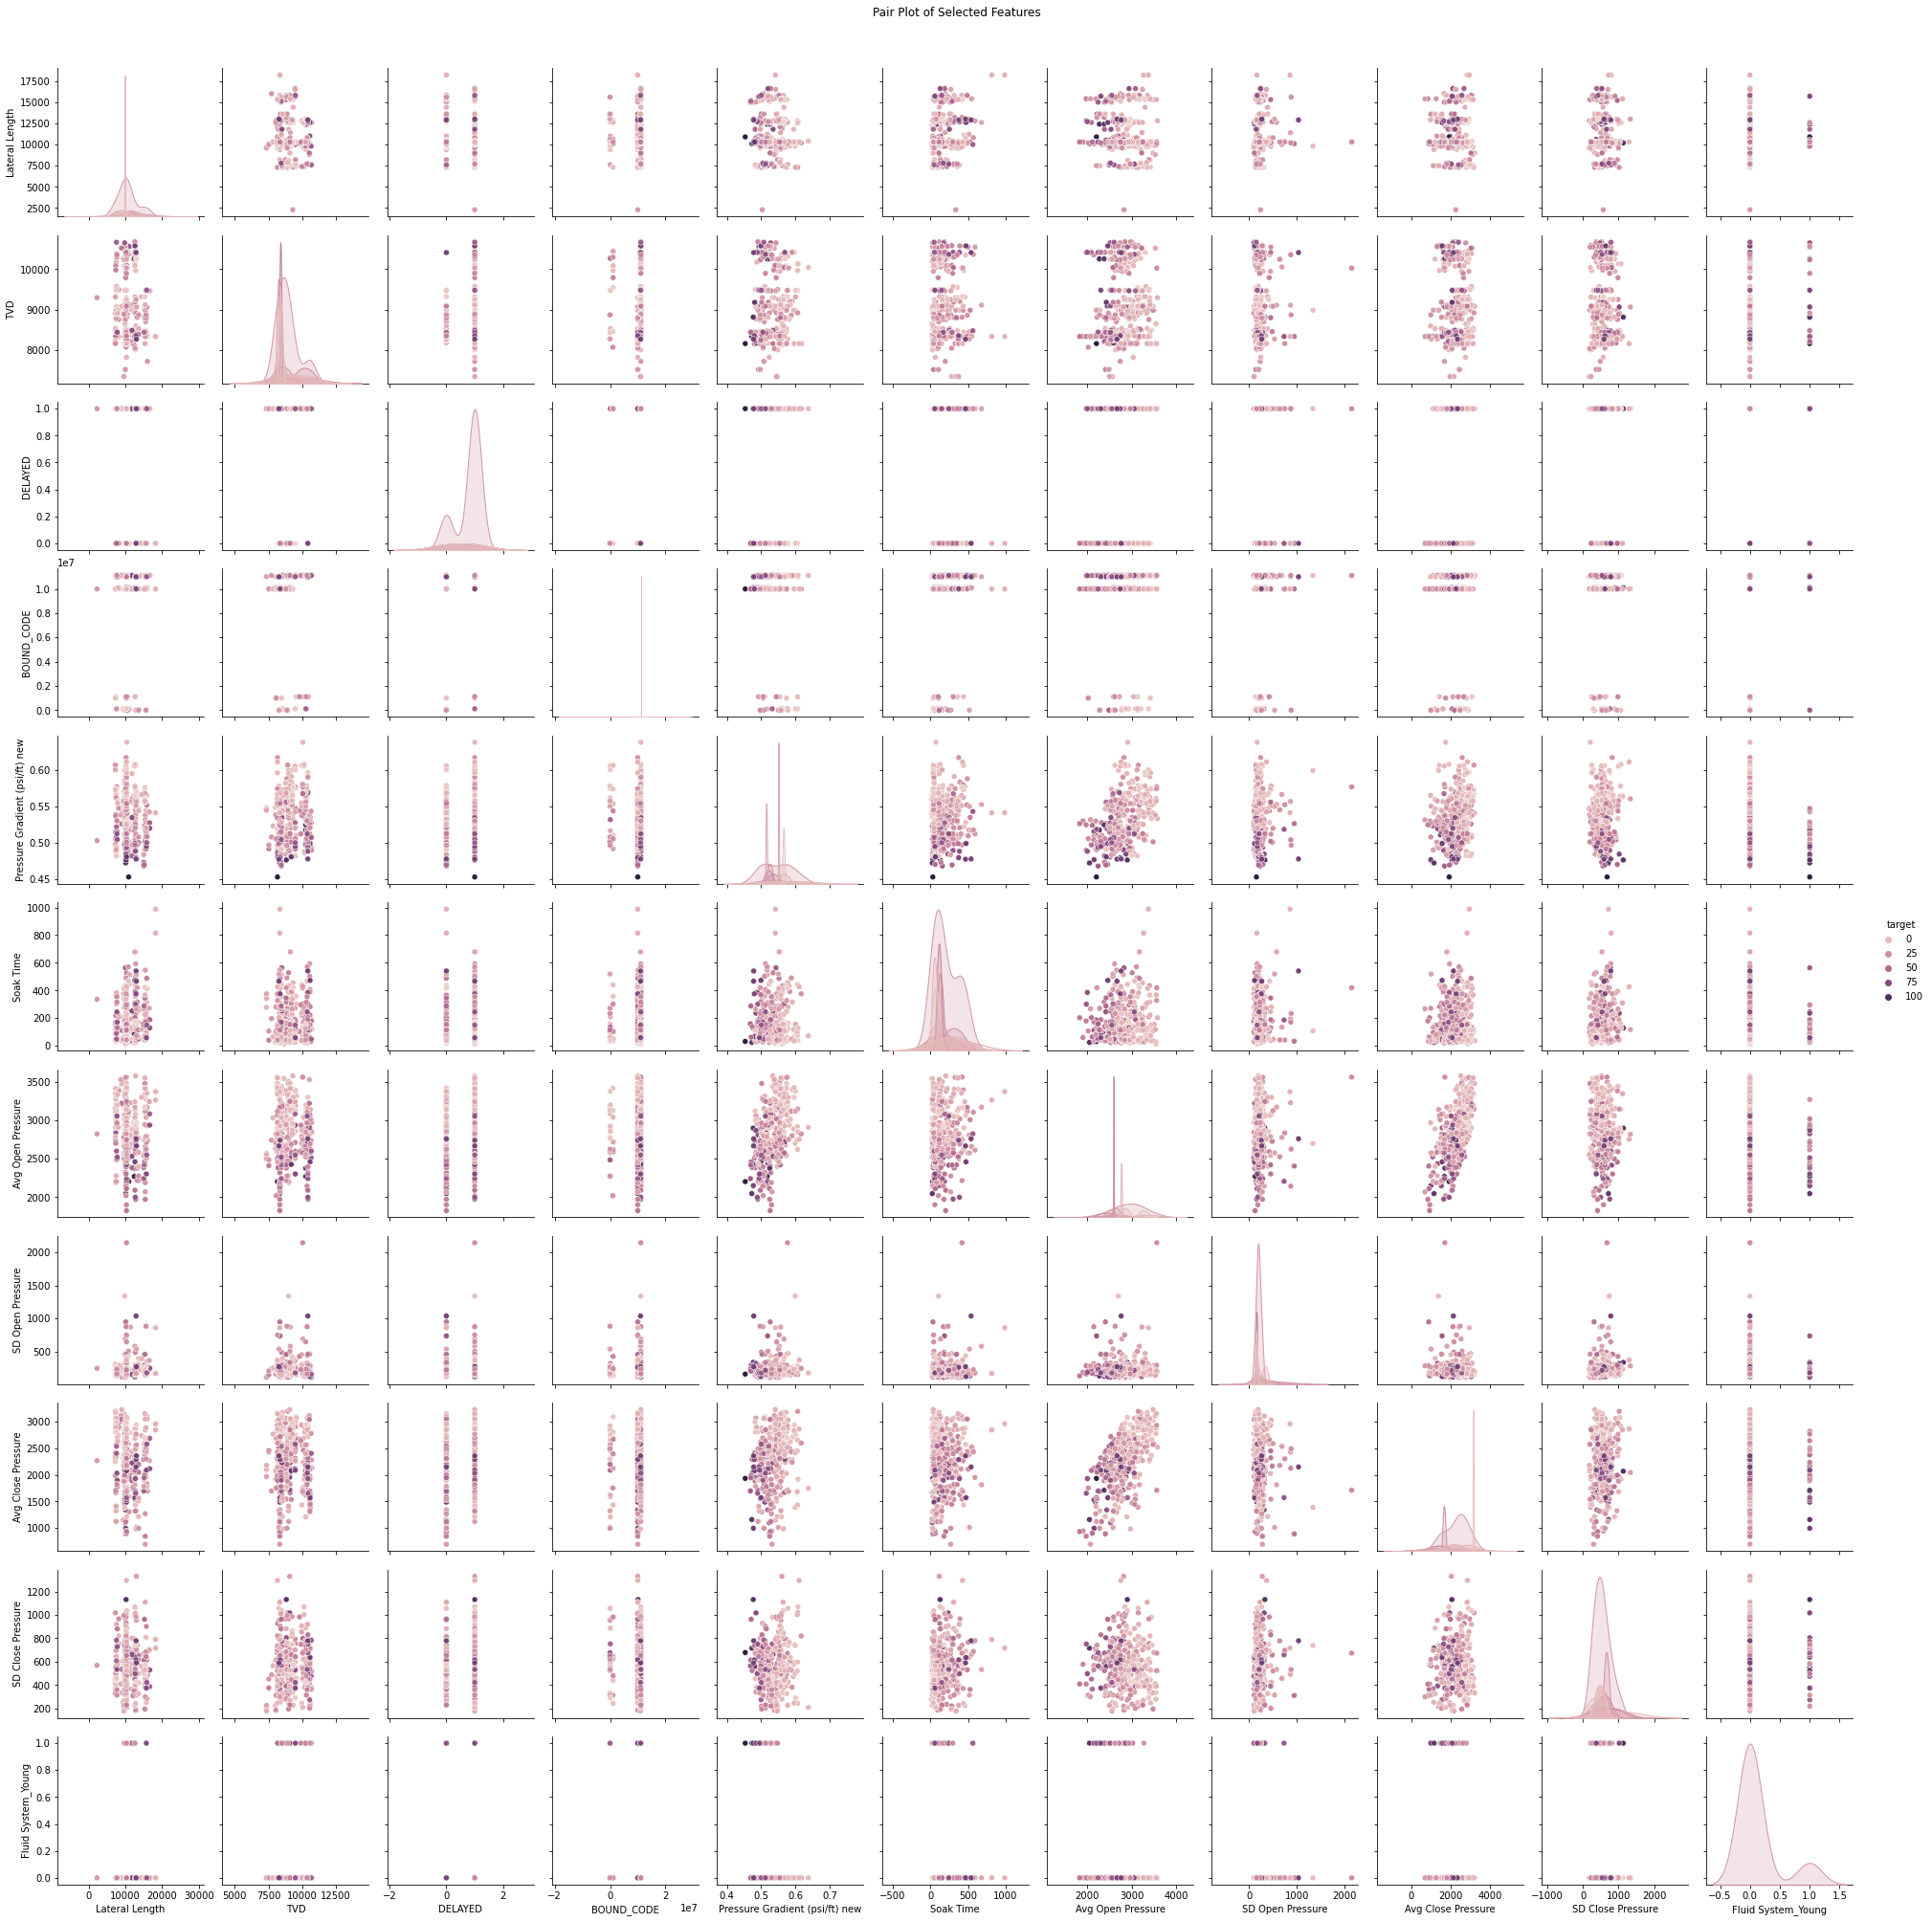

In [13]:
# Example of pair plot for visualization
import seaborn as sns

# Assuming 'selected_features' is a list of the most important feature names
selected_features = ['Lateral Length', 'TVD', 'DELAYED',
       'BOUND_CODE','Pressure Gradient (psi/ft) new', 'Soak Time',
       'Avg Open Pressure', 'SD Open Pressure', 'Avg Close Pressure',
       'SD Close Pressure','Fluid System_Young']

# Create a subset of the original dataset using the selected features
X_selected = X[selected_features]

# Add the target variable 'y' to the DataFrame
X_selected['target'] = y

# Pair plot for all feature combinations
sns.pairplot(X_selected, hue='target', height=2.5)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

C:\Users\power\AppData\Local\Temp/ipykernel_14216/4110659297.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['target'] = y


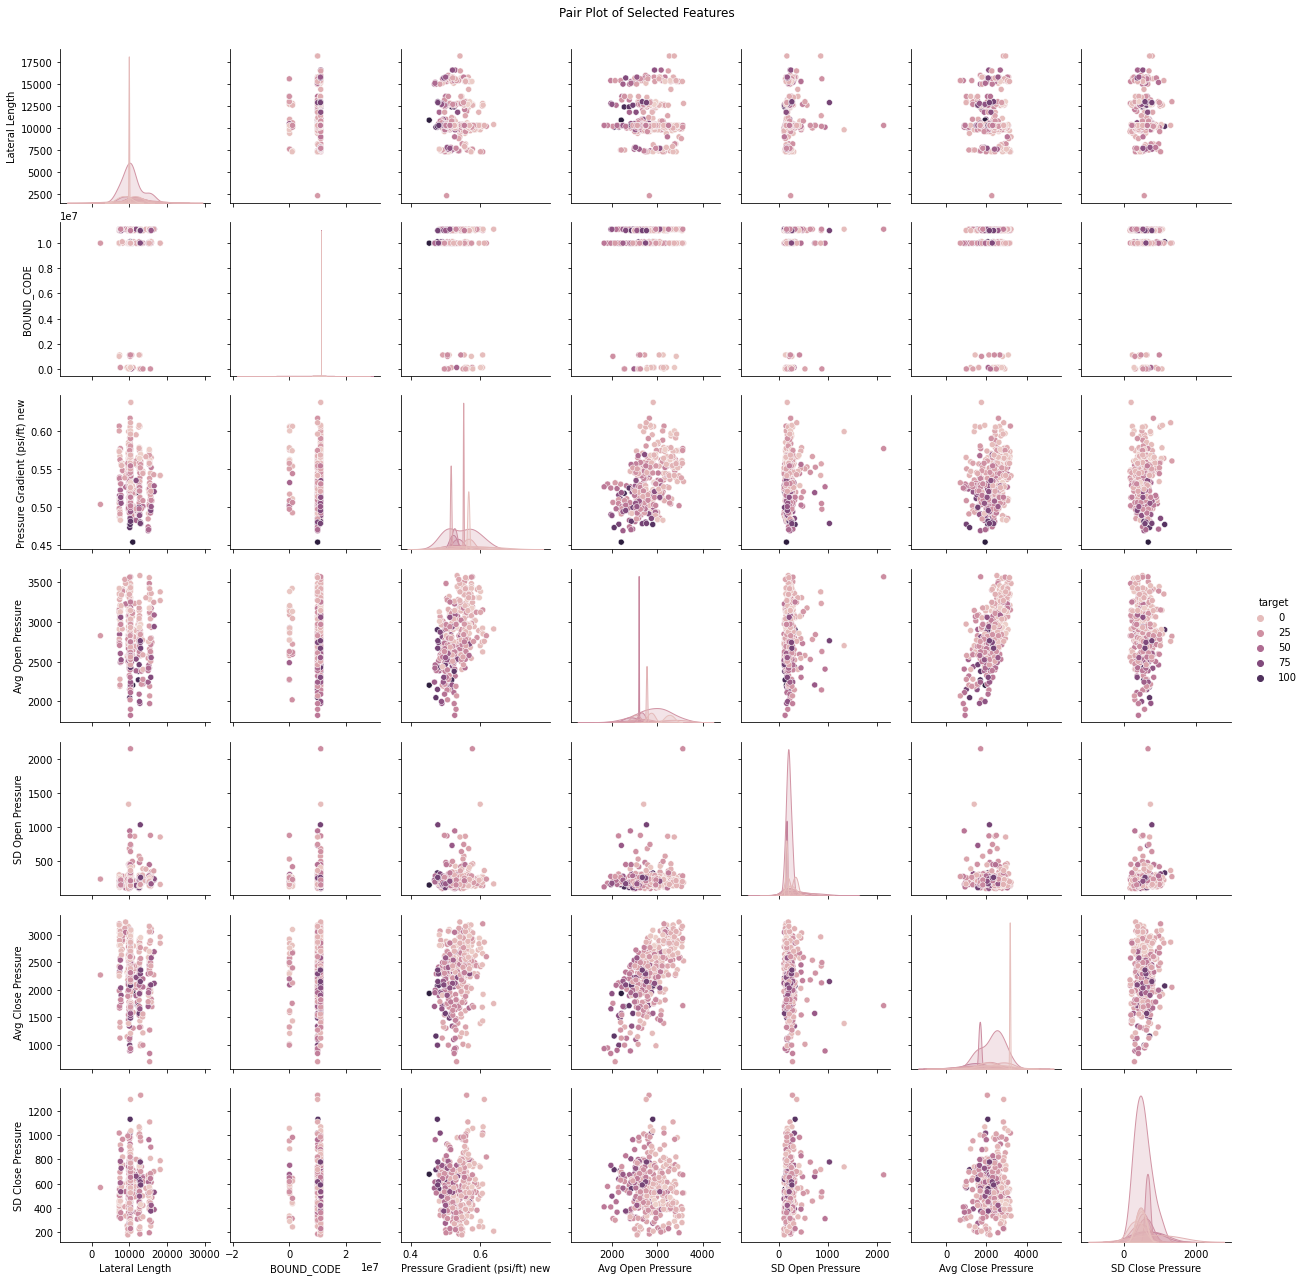

In [14]:
# Example of pair plot for visualization
import seaborn as sns

# Assuming 'selected_features' is a list of the most important feature names
selected_features = ['Lateral Length',
       'BOUND_CODE','Pressure Gradient (psi/ft) new',
       'Avg Open Pressure', 'SD Open Pressure', 'Avg Close Pressure',
       'SD Close Pressure']

# Create a subset of the original dataset using the selected features
X_selected = X[selected_features]

# Add the target variable 'y' to the DataFrame
X_selected['target'] = y

# Pair plot for all feature combinations
sns.pairplot(X_selected, hue='target', height=2.5)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [15]:
# Assuming 'selected_features_final' is a list of the final selected features
X_final = X[['Lateral Length',
       'BOUND_CODE','Pressure Gradient (psi/ft) new',
       'Avg Open Pressure', 'SD Open Pressure', 'Avg Close Pressure']]

# Re-train the model with the final selected features
model.fit(X_final, y)

LinearRegression()

In [16]:
from sklearn.model_selection import GridSearchCV

# Example of grid search for hyperparameter tuning
param_grid = {'n_estimators': [60], 'max_depth': [15]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_final, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Use the best model for predictions
best_model = grid_search.best_estimator_
predictions_tuned = best_model.predict(X_final)

Best Hyperparameters: {'max_depth': 15, 'n_estimators': 60}


348


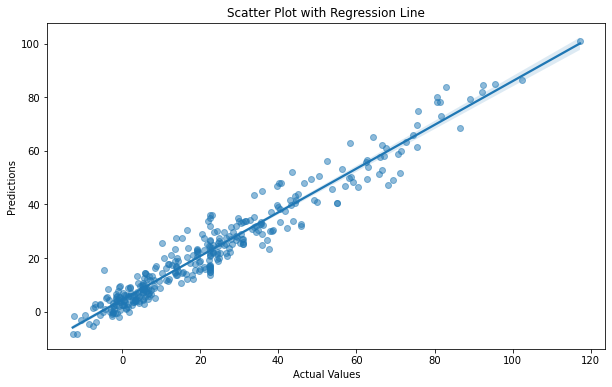

In [20]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y, y=predictions_tuned, scatter_kws={'alpha':0.5})
print(len(predictions_tuned))
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

# Assuming 'y' is the actual target values and 'predictions_tuned' are the model predictions
mse = mean_squared_error(y, predictions_tuned)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 41.47634654417967


In [19]:
df.columns

Index(['Well ID', 'Avg Pump Difference', 'Lateral Length', 'TVD', 'DELAYED',
       'BOUND_CODE', 'PARENT_CODEV_1050_WELL_COUNT',
       'PARENT_IN_ZONE_MIN_HYPOT', 'PARENT_OUT_ZONE_MIN_HYPOT',
       'PARENT_IN_ZONE_MIN_MAP_DIST', 'PARENT_OUT_ZONE_MIN_MAP_DIST',
       'PARENT_1050_AVG_WELL_AGE', 'PARENT_1050_MEDIAN_WELL_AGE',
       'PARENT_1050_WELL_COUNT', 'PARENT_3000_AVG_HYPOT_DIST',
       'PARENT_3000_AVG_MAP_DIST', 'PARENT_3000_AVG_TVD_DIST',
       'PARENT_3000_AVG_WELL_AGE', 'PARENT_3000_MEDIAN_WELL_AGE',
       'PARENT_3000_WELL_COUNT', 'CODEV_IN_ZONE_MIN_HYPOT',
       'CODEV_OUT_ZONE_MIN_HYPOT', 'CODEV_IN_ZONE_MIN_MAP_DIST',
       'CODEV_1050_WELL_COUNT', 'CODEV_3000_AVG_HYPOT_DIST',
       'CODEV_3000_AVG_MAP_DIST', 'CODEV_3000_AVG_TVD_DIST',
       'CODEV_3000_AVG_WELL_AGE', 'CODEV_3000_MEDIAN_WELL_AGE',
       'CODEV_3000_WELL_COUNT', 'Pressure Gradient (psi/ft) new', 'Soak Time',
       'Avg Open Pressure', 'SD Open Pressure', 'Avg Close Pressure',
       'SD Close P